# Liz making Crocker example stuff

In [1]:
from ripser import ripser
from teaspoon.TDA.Draw import drawDgm
from teaspoon.MakeData.PointCloud import Torus
from teaspoon.TDA.Persistence import maxBirth, minBirth, maxPers

numPts = 500
seed = 0

# Generate Torus
t = Torus(N=numPts,seed = seed)

# Compute persistence diagrams
PD1 = ripser(t,2)['dgms'][1]

print('Maximum Birth: ', maxBirth(PD1))
print('Minimum Birth: ', minBirth(PD1))
print('Max Persistence: ', maxPers(PD1))

Maximum Birth:  1.0100464820861816
Minimum Birth:  0.17203105986118317
Max Persistence:  1.3953008949756622


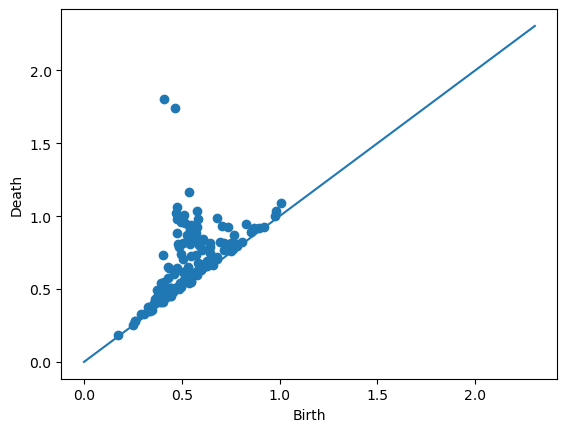

In [52]:
from ripser import ripser
from teaspoon.TDA.Draw import drawDgm
from teaspoon.MakeData.PointCloud import Torus,Annulus

numPts = 500
seed = 0

# Generate Torus
t = Torus(N=numPts,seed = seed)

# Compute persistence diagrams
PD1 = ripser(t,2)['dgms'][1]

# Plot the diagram
drawDgm(PD1)

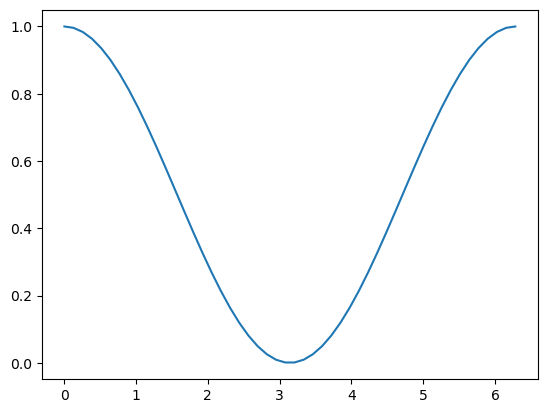

In [47]:
N = 50
theta = np.linspace(0,2*np.pi,N)
rvec = (np.cos(theta)+1)/2
plt.plot(theta,rvec)

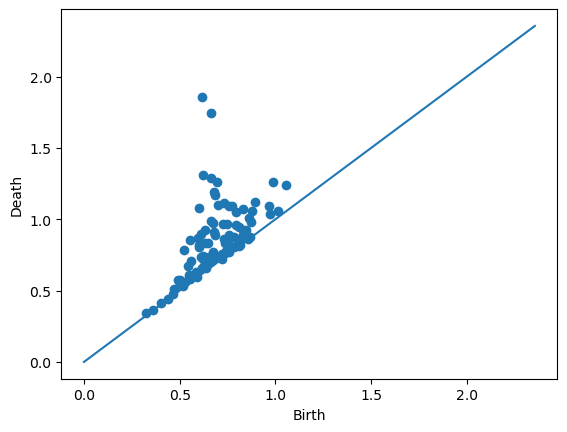

In [48]:
numPts = 300
seed = 0

i = 0


# Generate Torus
t = Torus(N=numPts,r = rvec[i],seed = seed)

# Compute persistence diagrams
PD1 = ripser(t,2)['dgms'][1]

# Plot the diagram
drawDgm(PD1)

In [49]:
DGMS = []

numPts = 300
seed = 0

for i in range(N):


    # Generate Torus
    t = Torus(N=numPts,r = rvec[i],seed = seed)

    # Compute persistence diagrams
    PD1 = ripser(t,2)['dgms'][1]

    DGMS.append(PD1)
  

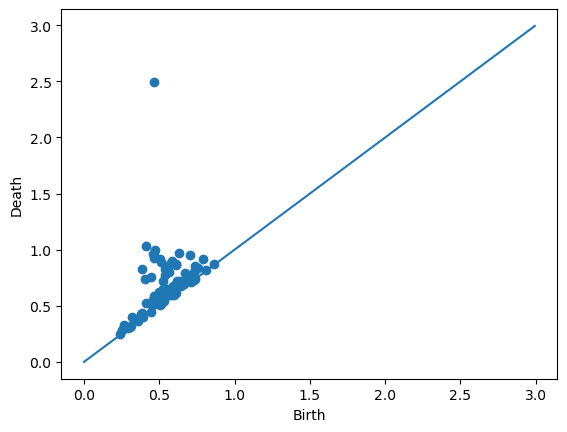

In [16]:
  
# Plot the diagram
drawDgm(DGMS[2])

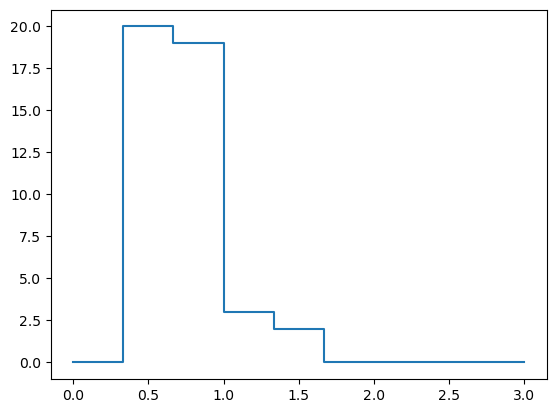

In [37]:
def BettiCurve(Dgm, maxEps = 3, numStops = 10):

    vecOfThresholds = np.linspace(0,maxEps,numStops)
    BettiCurve = np.zeros(np.shape(vecOfThresholds))

    for i,v in enumerate(vecOfThresholds):
        BettiCurve[i] = sum(np.logical_and((Dgm[:,0]<v), (Dgm[:,1] >v) ))

    return vecOfThresholds,BettiCurve


    
# Generate Torus
T = Torus(N=300)

# Compute persistence diagrams
Dgm = ripser(T,2)['dgms'][1]

t,x = BettiCurve(Dgm,3,10)
plt.step(t,x)

In [38]:
AllBettis = []

for Dgm in DGMS:
    t,x = BettiCurve(Dgm,3,10)
    AllBettis.append(x)
    



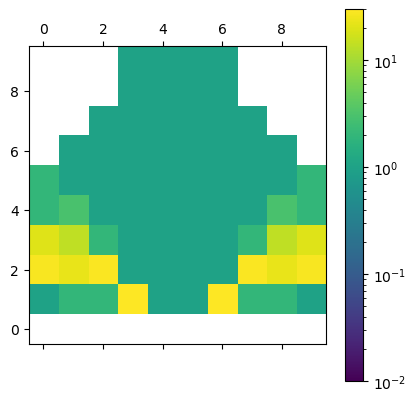

In [46]:
from matplotlib.colors import LogNorm


M = np.array(AllBettis).T
im = plt.matshow(M,origin = 'lower',norm = LogNorm(vmin=0.01,vmax = 30))
plt.colorbar(im)

## Making an annulus example 



In [64]:
# Make sure to run these imports
import numpy as np
import matplotlib.pyplot as plt

from ripser import ripser
from teaspoon.TDA.Draw import drawDgm, drawPtCloud
from teaspoon.MakeData.PointCloud import Annulus

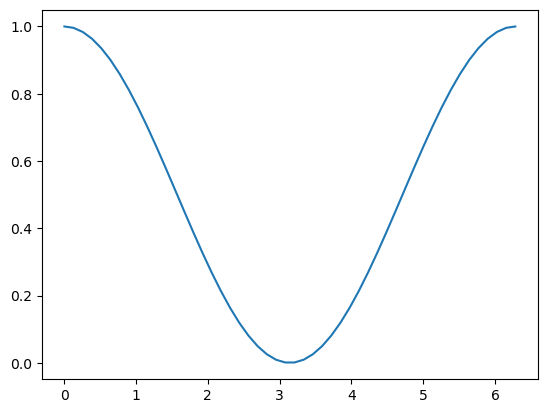

In [65]:
N = 50
theta = np.linspace(0,2*np.pi,N)
rvec = (np.cos(theta)+1)/2
plt.plot(theta,rvec)

In [66]:
PtClouds = []
DGMS = []

numPts = 100
seed = 0

for i in range(N):


    # Generate Annulus
    A = Annulus(N=numPts,r = rvec[i],seed = seed)
    PtClouds.append(A)

    # Compute persistence diagrams
    PD1 = ripser(A,2)['dgms'][1]

    DGMS.append(PD1)
    

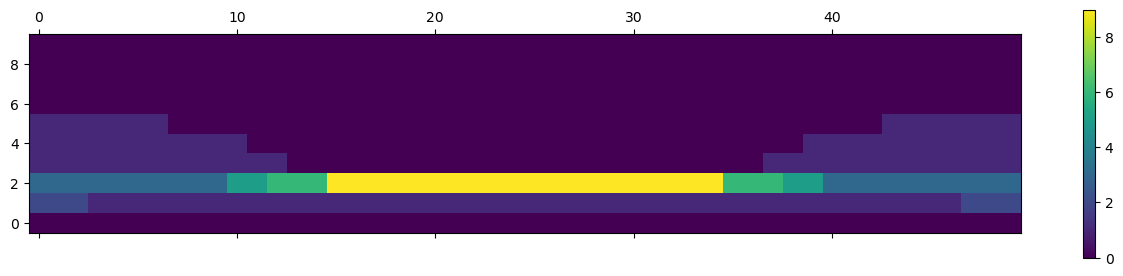

In [67]:
AllBettis = []

for Dgm in DGMS:
    t,x = BettiCurve(Dgm,3,10)
    AllBettis.append(x)
M = np.array(AllBettis).T
im = plt.matshow(M,origin = 'lower')
plt.colorbar(im)    

In [68]:
def drawingCrocker(A,Dgm,M):
    # Drawing 
    fig = plt.figure(figsize = (9,3))
    plt.subplot(1,3,1)
    drawPtCloud(A)
    plt.axis('square')
    plt.subplot(1,3,2)
    drawDgm(Dgm)
    plt.axis('square')
    plt.subplot(1,3,3)
    im = plt.matshow(M,origin = 'lower')
    plt.colorbar(im)    
    ax = plt.gca()
    ax.set(xlabel='Complex Parameter', ylabel='Filtration Parameter')


    plt.subplots_adjust( wspace = 0.3)

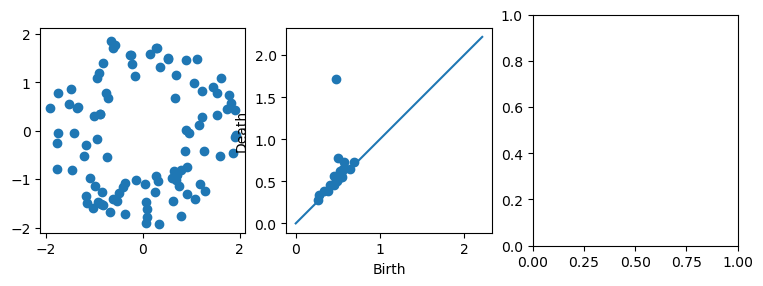

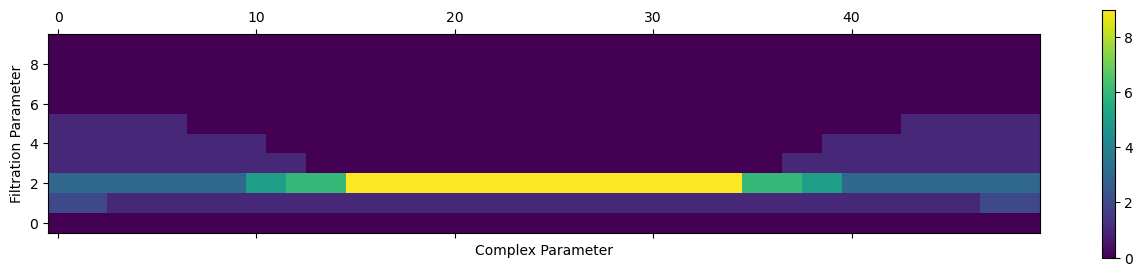

In [69]:
i = 5
drawingCrocker(PtClouds[i],DGMS[i],M)